###  Libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
from KernelKMeans import KernelKMeans
from GlobalKernelKMeans import GlobalKernelKMeans, GlobalKernelKMeansPP 
from Datasets.Datasets_Functions import *
from Common_Modules.Rings import Rings
from Common_Modules.Evaluation import Evaluator
from Common_Modules.Visualization import Visualization
from Common_Modules.General_Functions import General_Functions

### Switches

In [2]:
plot_is_enabled = True
kernelKMeans_is_enabled = True
globalKernelKMeans_is_enabled = True
globalKernelKMeansPP_is_enabled = True

### Global Variables

In [3]:
seed = 42
evaluator = Evaluator()
n_candidates = n_init = 100
kernel = "rbf"

### Visualization

In [4]:
visualization = Visualization()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'cyan', 'gray', 'lime']

### Rings

Directory 'Results\10Rings\rbf\100\1.12' created successfully.


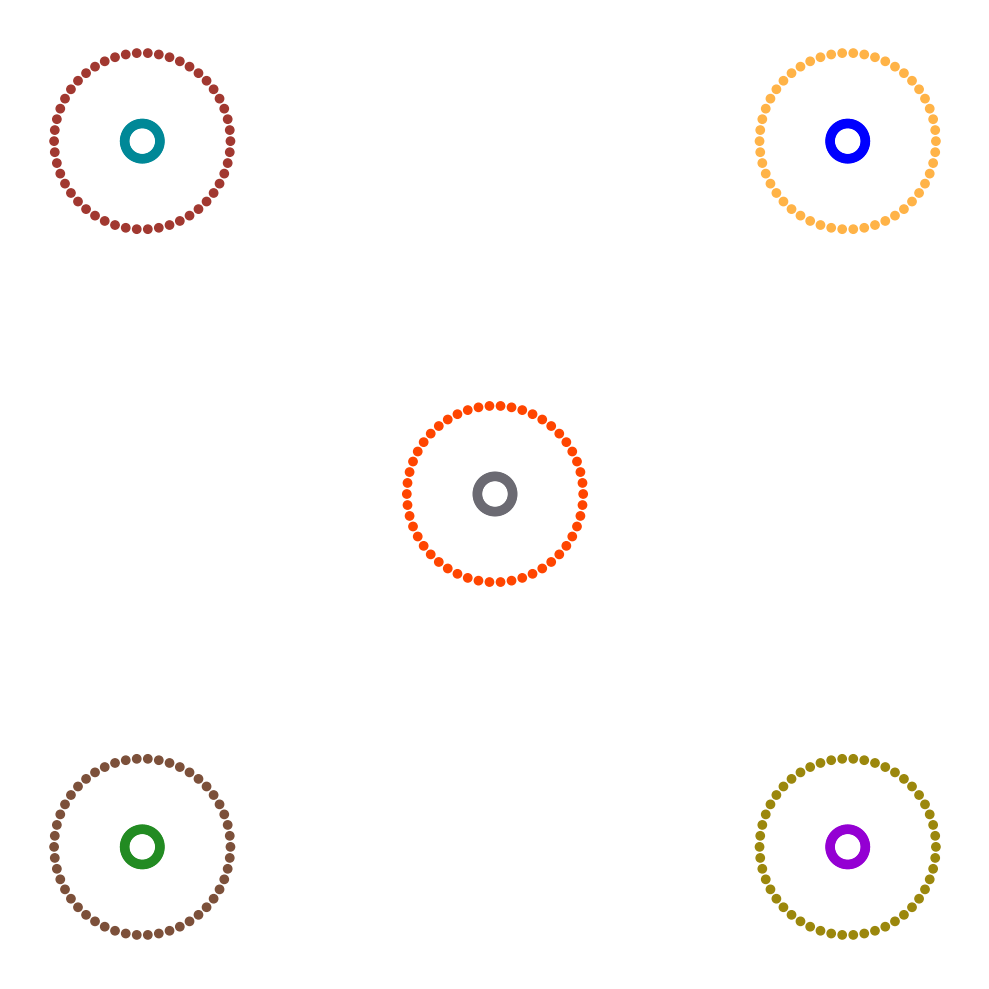

In [5]:
centers_coordinates = [(-2, 2), (2, 2), (6, 2), (5, 6), (-1, 6), (2, 10), (5, -2), (2, -6), (-1, -2)] #Paper 18 Rings 
gamma = 1.0 #Paper 18 Rings

#centers_coordinates = [(-2, 6), (2, 2), (6, 6), (-2, -2), (6, -2)] #Paper 10 Rings 
#gamma = 1.12 #Paper 10 Rings

rings = Rings()
X, y = rings.make_rings_pairs(centers_coordinates=centers_coordinates, n_samples=100, factor=0.2, noise=0.0)
K = 2 * len(centers_coordinates)

kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=gamma)
dataset_name = f"{K}Rings"
data_dir_path = f"Results\\{dataset_name}\\{kernel}\\{n_init}\\{gamma}"
General_Functions().create_directory(data_dir_path)
visualization.plot(X, y, data_dir_path=f"{data_dir_path}Generated")

### Kernel kMeans

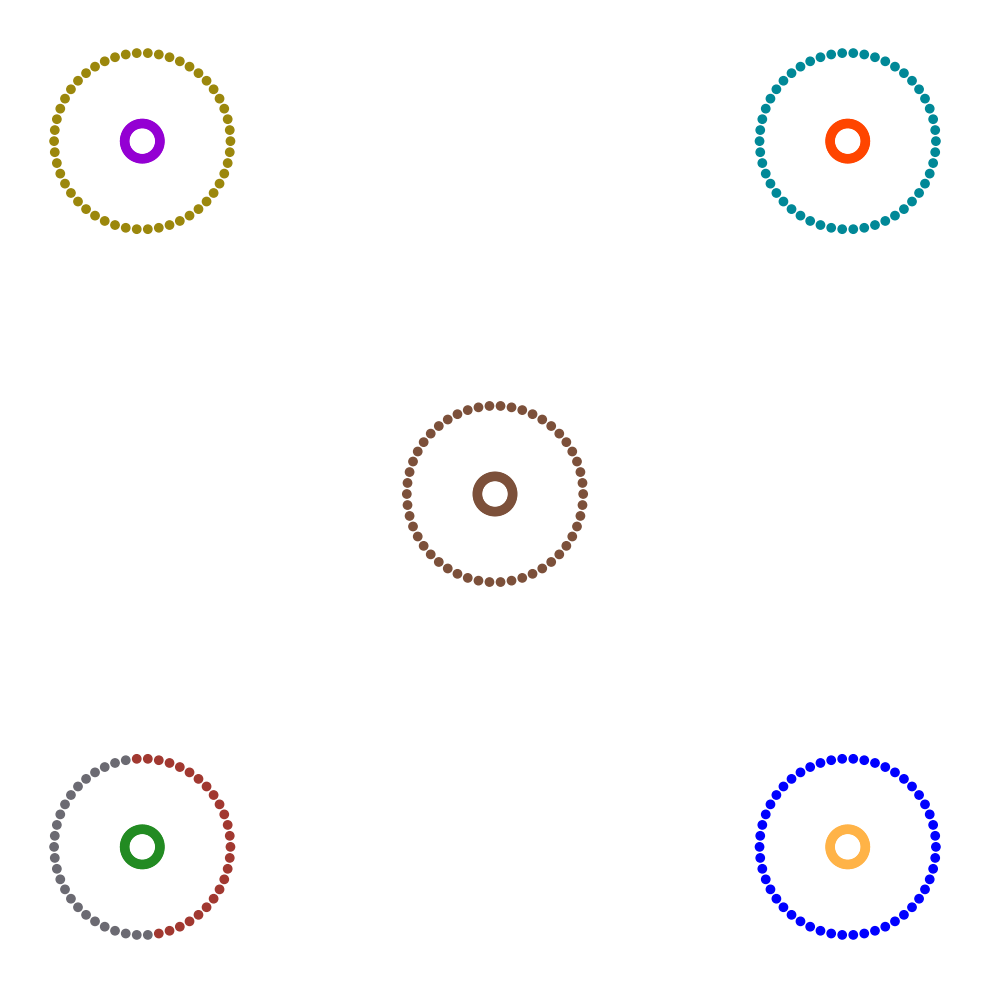

K: 10, MSE: 203.8979719523528, ITERATIONS: 1312, EXECUTION TIME: 0.8768095970153809
ACC: 0.85 PUR: 0.90 NMI: 0.95 ARI: 0.87


In [6]:
if(kernelKMeans_is_enabled):
    initialization_methods = ["forgy", "random", "k-means++"]
    init = initialization_methods[1]

    kernelKMeans = KernelKMeans(n_clusters=K, kernel_matrix=kernel_matrix, n_init=n_init, init=init, verbose=0)
    kernelKMeans.fit()    

    if(plot_is_enabled):
        visualization.plot(X, kernelKMeans.labels_, data_dir_path=data_dir_path + "KernelKMeans_" + init)                
    
    n_iters_ = sum(kernelKMeans.n_iters_.values())
    execution_time_ = sum(kernelKMeans.execution_times_.values())
    inertia_ = kernelKMeans.inertia_
    print(f"K: {K}, MSE: {inertia_}, ITERATIONS: {n_iters_}, EXECUTION TIME: {execution_time_}") 
    
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kernelKMeans.labels_)
    evaluator.print_evaluation()  

### Global Kernel kMeans

Solving Kernel 2-means
Solved 2-means MSE: 406.9998412615316 in 2.3386800289154053s
Solving Kernel 3-means
Solved 3-means MSE: 360.4997620065582 in 2.396088123321533s
Solving Kernel 4-means
Solved 4-means MSE: 313.9996827723594 in 2.3839175701141357s
Solving Kernel 5-means
Solved 5-means MSE: 267.4996036212594 in 2.336106538772583s
Solving Kernel 6-means
Solved 6-means MSE: 253.78319222780414 in 2.6731045246124268s
Solving Kernel 7-means
Solved 7-means MSE: 240.06678083434895 in 2.546290636062622s
Solving Kernel 8-means
Solved 8-means MSE: 226.35036944089373 in 2.352191925048828s
Solving Kernel 9-means
Solved 9-means MSE: 212.63395804743854 in 2.3294458389282227s
Solving Kernel 10-means
Solved 10-means MSE: 198.91754665398335 in 2.002472162246704s
Total execution time was 21.35829734802246s
ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00


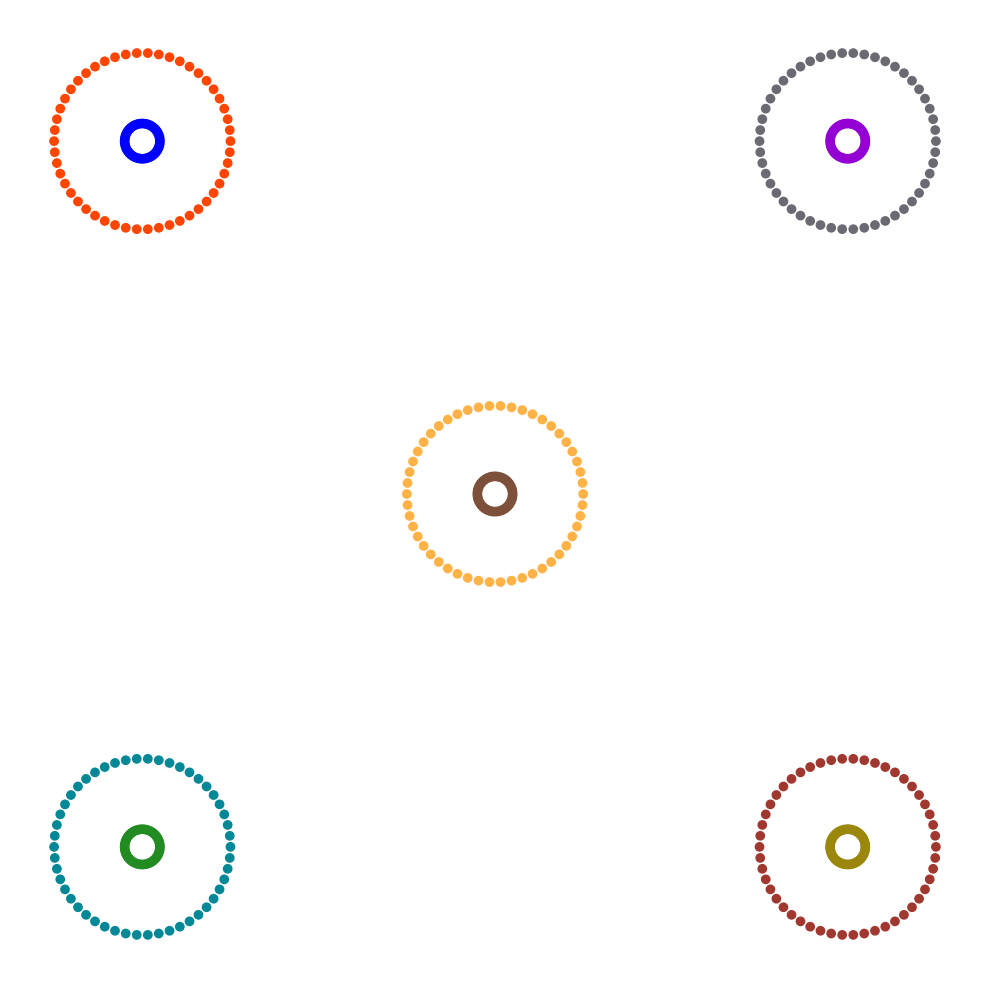

In [7]:
if(globalKernelKMeans_is_enabled):
    globalKernelKMeans = GlobalKernelKMeans(n_clusters=K, kernel_matrix=kernel_matrix, data_dir_path=f"{data_dir_path}GlobalKernelKMeans_Dataset_{dataset_name}_Kernel_{kernel}_K_{K}_Inits_{n_init}_Results.csv", verbose=1)
    globalKernelKMeans.fit()
        
    acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeans.labels_[K]) 
    evaluator.print_evaluation()
    if(plot_is_enabled):
        visualization.plot(X, globalKernelKMeans.labels_[K], data_dir_path=f"{data_dir_path}GlobalKernelKMeans")     

Solving 2-means
Solved 2-means MSE: 406.9998412615316 in 0.6635923385620117s
Solving 3-means
Solved 3-means MSE: 360.4997620065582 in 0.5235857963562012s
Solving 4-means
Solved 4-means MSE: 313.99968277235945 in 0.5578622817993164s
Solving 5-means
Solved 5-means MSE: 267.4996036212594 in 0.6480529308319092s
Solving 6-means
Solved 6-means MSE: 253.78319222780414 in 0.8656079769134521s
Solving 7-means
Solved 7-means MSE: 240.06678083434895 in 0.7722985744476318s
Solving 8-means
Solved 8-means MSE: 226.35036944089373 in 0.6674716472625732s
Solving 9-means
Solved 9-means MSE: 212.63395804743854 in 0.5710997581481934s
Solving 10-means
Solved 10-means MSE: 198.91754665398335 in 0.4924967288970947s
Total execution time was 5.762068033218384s
ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00


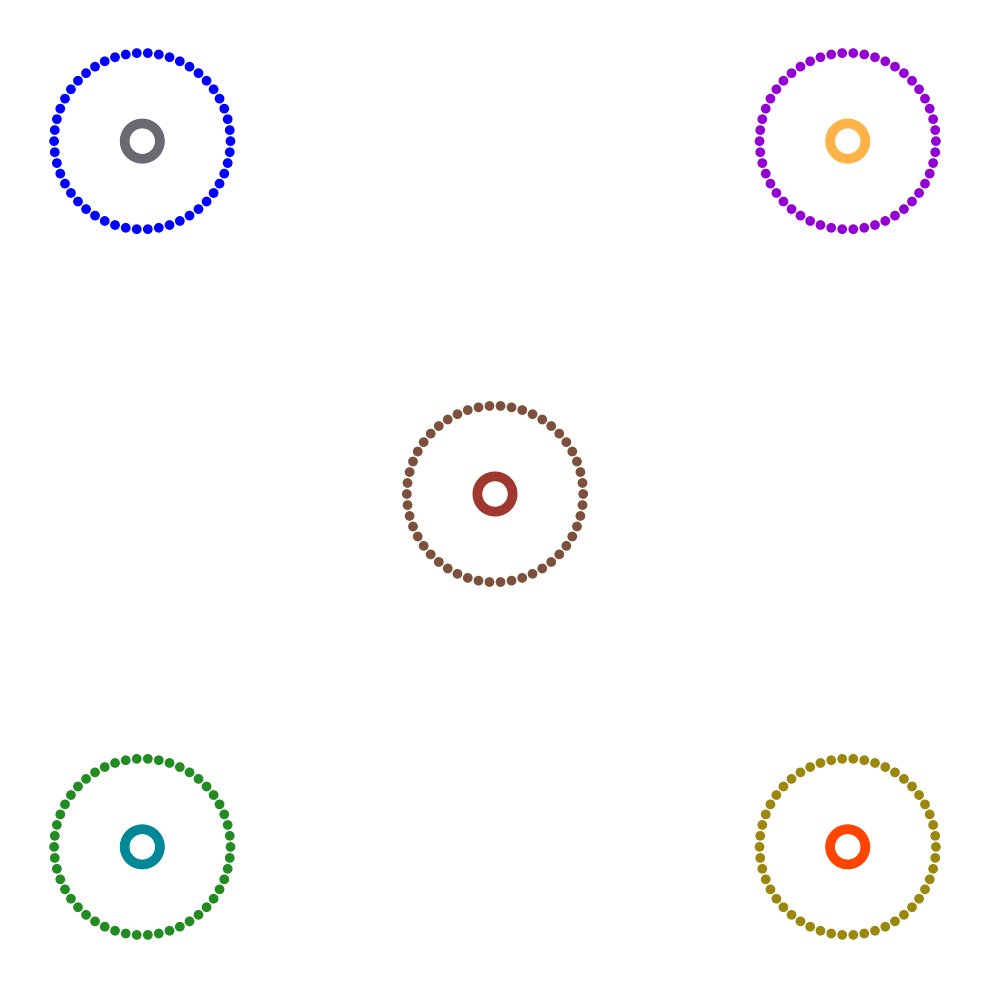

In [8]:
if(globalKernelKMeansPP_is_enabled):
    sampling_methods = ["sequential", "batch"]
    sampling = sampling_methods[1]
    globalKernelKMeansPP = GlobalKernelKMeansPP(n_clusters=K, kernel_matrix=kernel_matrix, n_candidates=n_candidates, sampling=sampling, data_dir_path=f"{data_dir_path}GlobalKernelKMeans_Dataset_{dataset_name}_Sampling_{sampling}_Kernel_{kernel}_K_{K}_Inits_{n_init}_Results.csv", verbose=1)
    globalKernelKMeansPP.fit()    

    acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeansPP.labels_[K]) 
    evaluator.print_evaluation()
    if(plot_is_enabled):
        visualization.plot(X, globalKernelKMeansPP.labels_[K], data_dir_path=f"{data_dir_path}GlobalKernelKMeans_{sampling}_")